In [29]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

import h5py
from skimage.feature import hog

In [30]:
size = 50
NUM_CLASSES = 31

In [35]:
def preprocess(img):
    ppc = 7
    resized = cv2.resize(img, (size + 0, size), interpolation = cv2.INTER_AREA)
#     fd,hog_image = hog(resized, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    gray = cv2.dilate(gray, (3, 3))
#     resized = resized.reshape(size, size, 1)
    res = gray.reshape((size + 0) * size)
#     print(res.shape)
#     print(resized.shape)
#     plt.imshow(resized)
    return res

In [53]:
def get_class(img_path):
    try:
#         print(img_path.split('\\')[-2])
        return int(img_path.split('\\')[-2])
    except Exception as e:
#         print(ord(img_path.split('\\')[-2]))
        return ord(img_path.split('\\')[-2]) - 55

In [54]:
try:
    with h5py.File('X.h5') as hf: 
        X, Y = hf['imgs'][:], hf['labels'][:]
    print("Loaded images from X.h5")
    
except Exception as e:
    root_dir = 'new_data/'
    imgs = []
    labels = []
    all_img_paths = glob.glob(os.path.join(root_dir, '*/*.png'))
    for img_path in all_img_paths:
        try:
#             print(img_path)
#             print(get_class(img_path))
            img = preprocess(cv2.imread(img_path))
            imgs.append(img)
#             print(img.shape[0])
            labels.append(get_class(img_path))
        except Exception as e:
            print(e)
    
    X = np.array(imgs, dtype='float32')
    Y = np.array(labels, dtype ='uint8')
#     Y = np.eye(NUM_CLASSES, dtype='uint8')[labels]
    with h5py.File('X.h5','w') as hf:
        hf.create_dataset('imgs', data=X)
        hf.create_dataset('labels', data=Y)
    
    print("Get Data Complete")

Get Data Complete


In [55]:
print(X.shape)
print(Y.shape)

(287, 2500)
(287,)


# Read test data

In [56]:
root_dir = 'plate_digit_text_test/'
imgs_test = []
labels_test = []
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.png'))
for img_path in all_img_paths:
#         print(img_path)
#     print(get_class(img_path))
    img = preprocess(cv2.imread(img_path))
    imgs_test.append(img)
#         print(img.shape[0])
    labels_test.append(get_class(img_path))
#     break

X_test = np.array(imgs_test, dtype='float32')
Y_test = np.array(labels_test, dtype ='uint8')

[13  0 13  0 25  1 25  1 10 13 11 13 11 12 12 13 13 14 14 14 15 15 14 13
 12 17 17 21 17 18 18 18 12 12  2  2  2  2 20 20 21 21 13 22 22 15 15 22
 22 13 23 13 23 24 24 25 25 13 13 12 13 13 27 27 27 27 28 30  3  3  3  3
  3  3  3  4  4  4 24  5  5  5  5  5 16 12  6  6  7  7  7 13  8 13  8 13
  9  9  9]
1   0.7070707070707071
[13  0 11  0 25  1 25  1 10 13  8 13  8 12 12 13 13 14 14 14 12 15 14 13
 12 13 17 17 17 18 18 18 12 12  2  2  2  2 20 20 13 13 13 22 22 15 15 22
 22 13 23 13 23 24 24 25 25 13 13 12 13 13 27 27 27 27 28 28  3  3  3  3
  3  3  3  4  4  4 24  5  5  5  5  5  6 12  6  6  7  7  7 13  8 13  8 13
  9  9  9]
2   0.6666666666666666
[13  0 13  0 25  1 25  1 10 13 11 13 11 12 12 13 13 13 14 14 12 15 12 13
 13 17 17 17 17 18 18 18 12 12  2  2  2  2 20 20 13 13 13 22 22 26 26 22
 22 13 23 13 23 24 24 25 25 13 13 12 13 13 27 27 27 27 28 28  3  3  3  3
  3  3  3  4  4  4 24  5  5  5  5  5  6 12  6  6  7  7  7 13  8 13  8 13
 11  8  9]
3   0.6666666666666666
[13  0 13  0 25  1 25 

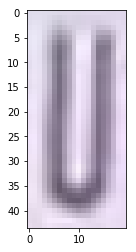

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

test_img = cv2.imread('plate_digit_text_test/26/002.png')
plt.imshow(test_img)
test_img = preprocess(test_img)
test_array = []
test_array.append(test_img)

# print(test_array)
# print(X_test)

k_range = range(1,26)
k = 20
scores = {}
scores_list = []

##### Best K is 11 
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, Y)
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    y_pred = knn.predict(X_test)
    print(y_pred)
    print(k, " ", metrics.accuracy_score(Y_test, y_pred))

In [65]:
test_img = cv2.imread('plate_digit_text_test/0/001.png')
test_img = preprocess(test_img)
test_array = []
test_array.append(test_img)
print(knn.predict(test_array))

[13]
